<h1> Machine Learning - 1 Assignment - 1 </h1>
<br>
<h2> Gaurang Ashava RA2111027010007 - AA1 </h2>

In [102]:
#Import the necessary libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder

<h3>Import the dataset weather.csv</h3>

In [104]:
data = pd.read_csv('C:/Users/Gaurang Ashava/Downloads/weather.csv')

In [105]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [106]:
data.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No
365,12.3,30.2,0.0,6.0,12.6,NW,78.0,NW,WNW,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,No,0.0,No


In [107]:
data.columns.tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

<h3>Check the number of null values</h3>

In [108]:
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

<h3>Drop the null rows and columns</h3>

In [109]:
data=data.dropna()

In [110]:
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [111]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,40.396341,10.414634,18.185976,71.100610,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,1.422561
std,5.945199,6.707310,4.289427,2.681183,3.506646,13.132176,7.811544,8.926759,12.983367,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,4.234023
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,2.000000,4.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,31.000000,6.000000,11.000000,63.000000,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,39.000000,7.000000,17.000000,71.000000,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,46.000000,13.000000,24.000000,80.000000,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        328 non-null    float64
 1   MaxTemp        328 non-null    float64
 2   Rainfall       328 non-null    float64
 3   Evaporation    328 non-null    float64
 4   Sunshine       328 non-null    float64
 5   WindGustDir    328 non-null    object 
 6   WindGustSpeed  328 non-null    float64
 7   WindDir9am     328 non-null    object 
 8   WindDir3pm     328 non-null    object 
 9   WindSpeed9am   328 non-null    float64
 10  WindSpeed3pm   328 non-null    int64  
 11  Humidity9am    328 non-null    int64  
 12  Humidity3pm    328 non-null    int64  
 13  Pressure9am    328 non-null    float64
 14  Pressure3pm    328 non-null    float64
 15  Cloud9am       328 non-null    int64  
 16  Cloud3pm       328 non-null    int64  
 17  Temp9am        328 non-null    float64
 18  Temp3pm   

<h3>Apply label encoder for all the string attributes</h3>

In [113]:
from sklearn.preprocessing import LabelEncoder

cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','Cloud9am','Cloud3pm']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,90,111,0,15,43,NW,8,SW,NW,2,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,138,130,16,20,75,ENE,12,E,W,1,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,135,106,16,27,24,NW,33,N,NNE,2,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,133,42,43,34,69,NW,20,WNW,W,15,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,86,46,13,26,84,SSE,18,SSE,ESE,10,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


<h3>“WindGustDir, WindDir”, Convert the above attributes into numbers</h3>

In [114]:
pd.to_numeric(data.WindGustDir,errors='coerce')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
361   NaN
362   NaN
363   NaN
364   NaN
365   NaN
Name: WindGustDir, Length: 328, dtype: float64

In [115]:
pd.to_numeric(data.WindDir3pm,errors='coerce')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
361   NaN
362   NaN
363   NaN
364   NaN
365   NaN
Name: WindDir3pm, Length: 328, dtype: float64

In [116]:
print(data.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  328.000000  328.000000  328.000000   328.000000  328.000000   
mean    87.118902   83.326220    4.274390    21.375000   61.390244   
std     47.072472   47.709432    9.629419    13.025132   29.235731   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%     45.750000   42.000000    0.000000    10.750000   40.000000   
50%     89.000000   82.000000    0.000000    20.000000   65.500000   
75%    128.000000  121.000000    1.000000    31.000000   85.000000   
max    169.000000  174.000000   43.000000    54.000000  111.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     328.000000    328.000000    328.000000   328.000000   328.000000   
mean       13.085366      4.588415     18.185976    71.100610    44.003049   
std         6.193024      4.234501      8.926759    12.983367    16.605975   
min         0.000000      0.000000      4.000000    36.00

<h3>Apply MinMax Scaler</h3>

In [117]:
X= data['MinTemp'].values.reshape(-1,1)
y= data['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

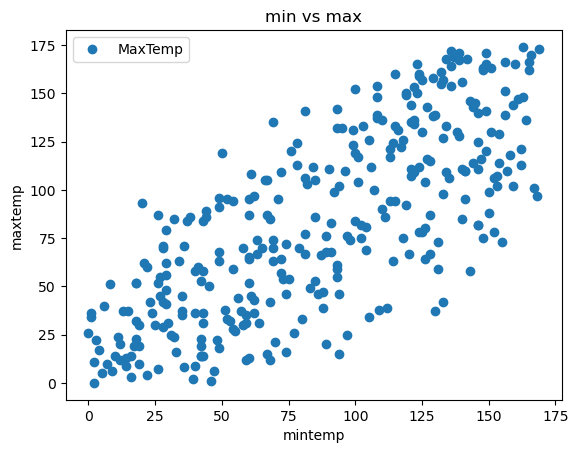

In [118]:
data.plot(x='MinTemp', y='MaxTemp' , style='o')
plt.title('min vs max')
plt.xlabel('mintemp')
plt.ylabel('maxtemp')
plt.show()

<h3>Construct Linear Regression Model</h3>

In [119]:
X= data['MinTemp'].values.reshape(-1,1)
y= data['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [120]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [121]:
print('Intercept is :',model.intercept_)

Intercept is : [15.96752555]


In [122]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[0.7716308]]


In [123]:
y_pred= model.predict(X_test)

In [124]:
df=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

    Actual   Predicted
0      139   99.303652
1      167  123.224206
2       65   62.265373
3       13   62.265373
4       69   96.217128
..     ...         ...
61       8   43.746234
62     102  134.027037
63      82   94.673867
64      14   49.147650
65      29   37.573188

[66 rows x 2 columns]


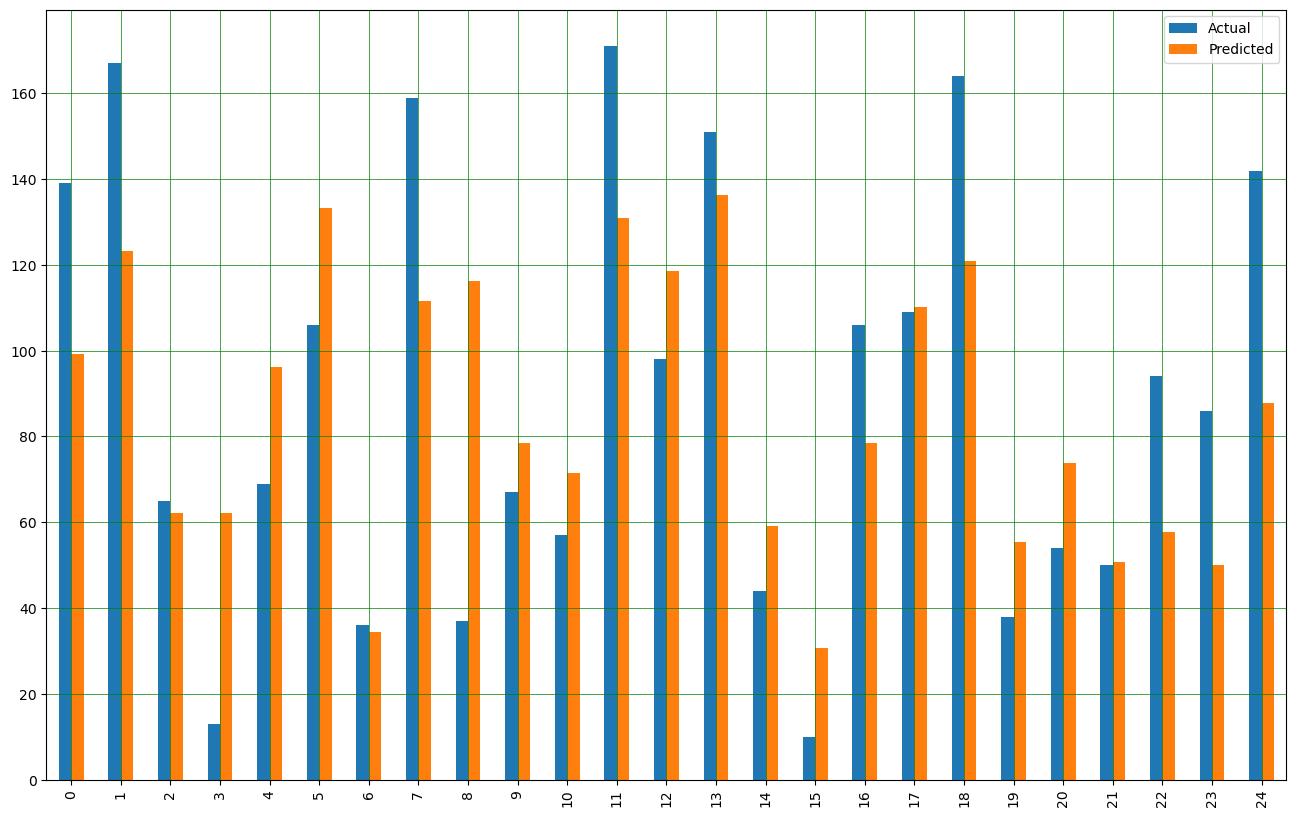

In [125]:
df1= df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

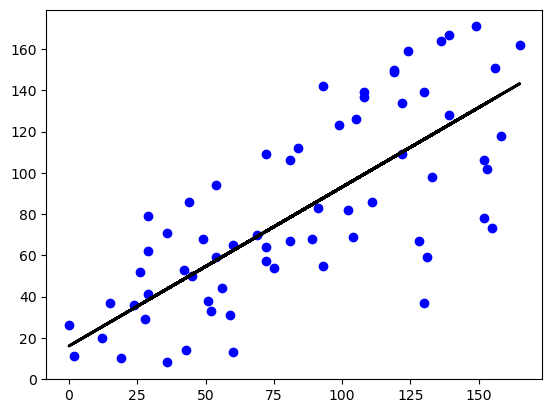

In [126]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='black',linewidth=2)
plt.show()

<h3>Find r2 value</h3>

In [127]:
print('The r^2 is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

The r^2 is: 30.697044411016307


<h3>Apply 6 Fold Cross Validation</h3>

In [128]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=6)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299

<h2> End of Assignment </h2>